### Workspace

In [2]:
%matplotlib notebook

from modsim import *

In [7]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [8]:
force_mag = .5 * m * kg /s**2
angle = 45 * degree
mass = .3 * kg

angle_rad = angle.to(radian)
fx, fy = pol2cart(angle_rad, force_mag)
force = Vector(fx, fy)
a_force = force/mass

In [27]:
condition = Condition(height = 10,
                      g = 9.8 ,
                      mass = 1,
                      length = .2,
                      width = .1,
                      rho = 1.2,
                      C_d = 0.3,
                      duration = 5.1,
                      C_t = .1)

In [28]:
def make_system(condition):
    unpack(condition)
    
    # make the initial state
    init = State(height=height, v=0)
    
    # compute area from diameter
    area = length * width
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, C_t=C_t, thrust=thrust, ts=ts)

In [29]:
def slope_func(state, t, system):
    height, v = state
    unpack(system)
    
    a_grav = -g
    
    f_drag = -rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    f_thrust = C_t
    a_thrust = f_thrust / mass
    
    a = a_grav + a_drag + a_thrust
    
    return v, a

<IPython.core.display.Javascript object>


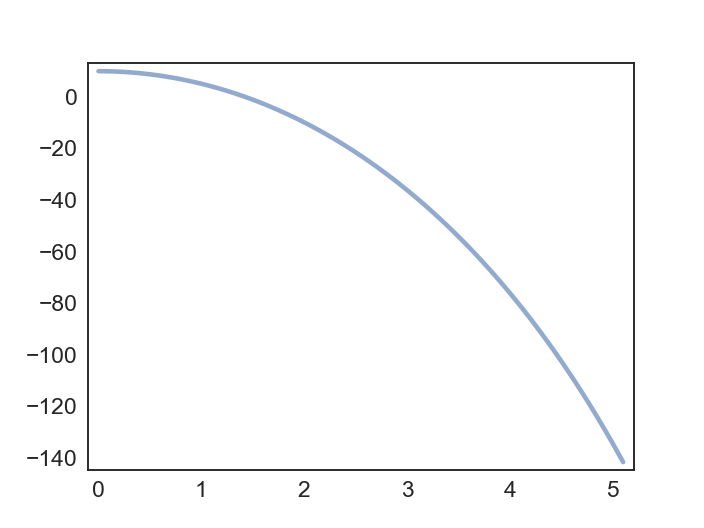

In [35]:
test = make_system(condition)
run_odeint(test, slope_func)
plot(test.results.height)